# This notebook demonstrates on different types of noises and its significance
There are different types of noises, here we explored Gaussian noise, and one of the denoising process
1. Gaussian Noise :	Random values from normal distribution
2. Salt & Pepper:	Random black and white pixels
3. Speckle Noise:	Multiplicative noise
4. Poisson Noise:	Photon shot noise

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
from PIL import Image

In [7]:
#load image
dataset = CIFAR10(root="./noisedata", download=True)


100%|██████████| 170M/170M [05:49<00:00, 487kB/s]  


In [28]:
type(dataset)

torchvision.datasets.cifar.CIFAR10

In [50]:
#explore the dataset
print("length of each tuple in list:", len(dataset[0]), "\n first element:",dataset[0][0]
      ,"second element:",dataset[0][1])

length of each tuple in list: 2 
 first element: <PIL.Image.Image image mode=RGB size=32x32 at 0x191452D2B50> second element: 6


In [53]:
#classes in dataset
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
img_pil, label =dataset[0]

In [15]:
img_np=np.array(img_pil)

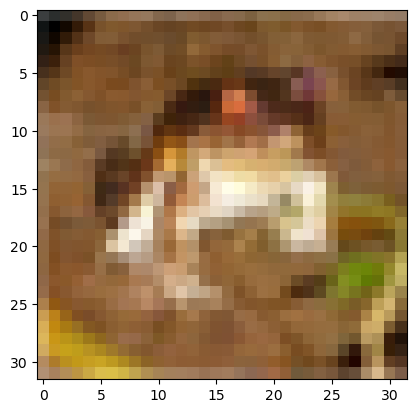

In [18]:
plt.imshow(img_np)
plt.show()

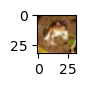

In [26]:
#the image resolution is low and when you display iamge is wrapped hence, we reduced the display size for better understnading.
plt.figure(figsize=(0.5,0.5))
plt.imshow(np.array(dataset[0][0]))

In [27]:
print(np.array(dataset[0][1]))

6


In [64]:
# add Gaussian noise
mean = 0
std=25
# creates random np array with normal distribution mean, std dev, shape
noise = np.random.normal(mean,std,img_np.shape)

In [72]:
img_noisy= img_np.astype(np.int16)+noise.astype(np.int16)
img_noisy.shape

(32, 32, 3)

In [73]:
print(img_noisy.max(),img_noisy.min())

282 -68


In [74]:
img_noisy = np.clip(img_noisy,0,255).astype(np.uint8)
print(img_noisy.max(),img_noisy.min())

255 0


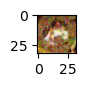

In [76]:
plt.figure(figsize=(0.5,0.5))
plt.imshow(img_noisy) # zoom the image and you can find difference

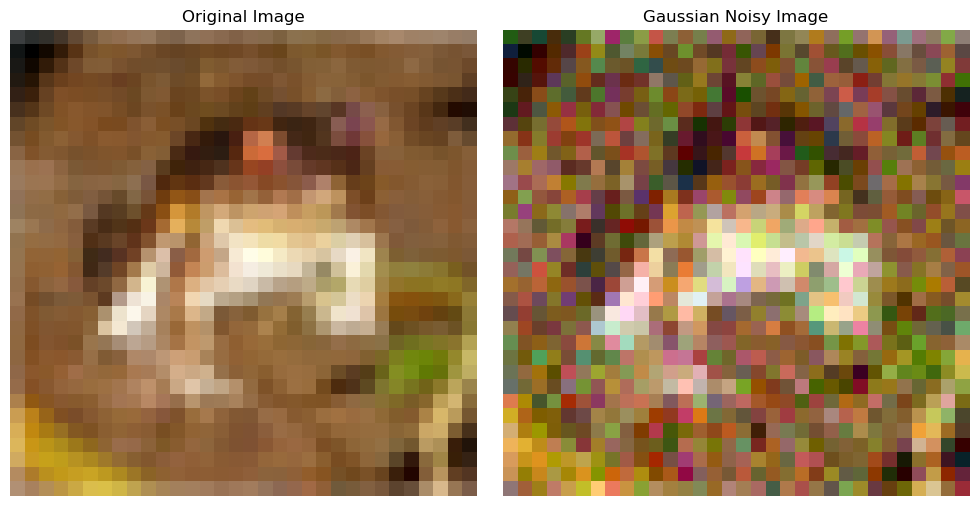

In [77]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_noisy)
plt.title("Gaussian Noisy Image")
plt.axis('off')

plt.tight_layout()
plt.show()

## Denoising of the image

In [83]:
#!pip install opencv-contrib-python

import cv2

In [84]:
# kernel size 3 this must be odd size to define exact centre pixel
denoise_img=cv2.medianBlur(img_noisy,3)

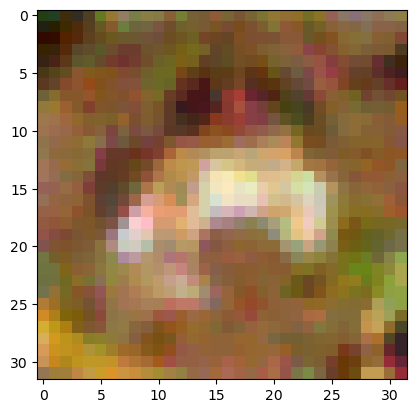

In [85]:
plt.imshow(denoise_img)
plt.show()

## Further exploration of noise distrubtion via histogram

In [65]:
#noise shape = = image shape
print("noise shape:", noise.shape)

noise shape: (32, 32, 3)


In [66]:
# lets check normal distrbution
noise_flat = noise.flatten()

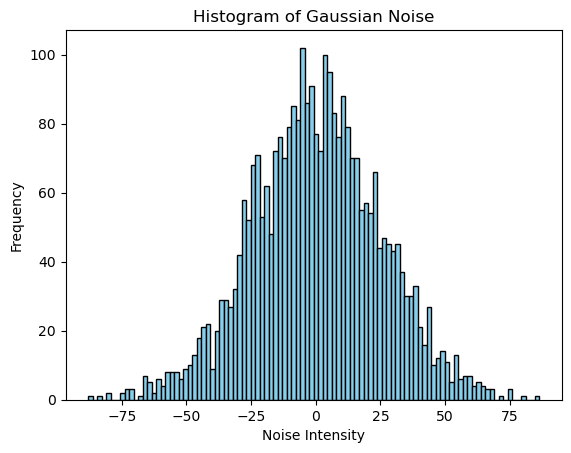

In [71]:
#plot 
plt.hist(noise_flat, bins=100, color='skyblue', edgecolor='black')
plt.title("Histogram of Gaussian Noise")
plt.xlabel("Noise Intensity")
plt.ylabel("Frequency")
plt.show()

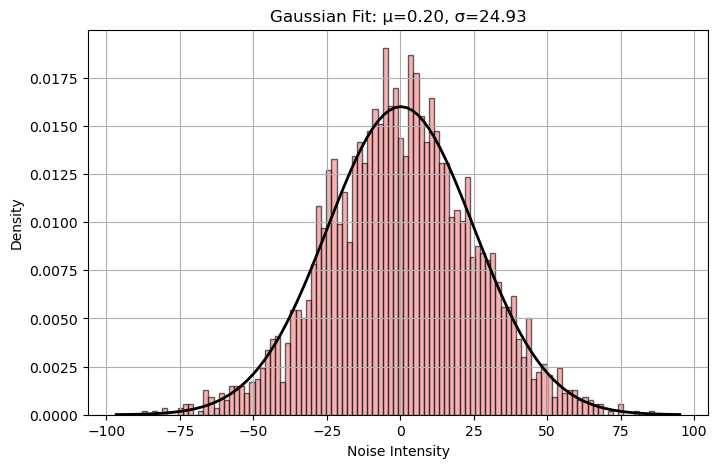

In [70]:
import scipy.stats as stats

# Fit a normal distribution to the data
mu, std = stats.norm.fit(noise_flat)

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(noise_flat, bins=100, density=True, alpha=0.6, color='lightcoral', edgecolor='black')

# Plot the PDF curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title(f"Gaussian Fit: μ={mu:.2f}, σ={std:.2f}")
plt.xlabel("Noise Intensity")
plt.ylabel("Density")
plt.grid(True)
plt.show()
